# MNIST Project

- Make a decorator that tells you how much time it takes for a cell/model to run/fit
- Make a function to make plotting things easy
- Make a function to save your ML models

## Import Python Libraries

**Importing standard libraries**

In [1]:
import numpy as np
np.random.seed(76)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from time import time
import os

**Importing SKL ML stuff**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

**Other Functions**

In [3]:
def performance(func):
    def wrapper(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f"Time taken: {t2-t1} seconds")
        return result
    
    return wrapper

In [20]:
@performance
def long_time(x):
    for _ in range(x):
        _*5

In [64]:
long_time(10000)

Time taken: 0.001994609832763672 seconds


In [4]:
LOCAL_FOLDER_PATH = "02_images" # Create this directory to store ALL downloaded data sets
PROJECT_ROOT_DIR = "."
os.makedirs(LOCAL_FOLDER_PATH, exist_ok=True)

def save_figure(figure_name, tight_layout=True, fig_extension="png", resolution=300):
    image_path = os.path.join(LOCAL_FOLDER_PATH, figure_name + "." + fig_extension)
    print("Saving figure", figure_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path, format=fig_extension, dpi=resolution) 

In [71]:
# Code for saving a model (YOU SHOULD MAKE A SEPARATE FUNCTION JUST FOR SAVING MODELS!!!!!)
# Will save as a pickle file

import joblib

# joblib.dump(linear_regression_model, "my_lin_reg_model.pkl")
# joblib.dump(decision_tree_model, "my_decision_tree_model.pkl")
# joblib.dump(random_forest_model, "my_forest_model.pkl")

# To load a saved model
# loaded_model = joblib.load("<model name>")

In [73]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)
    train_errors, validation_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predictions = model.predict(X_train[:m])
        y_valid_predictions = model.predict(X_valid)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predictions))
        validation_errors.append(mean_squared_error(y_valid, y_valid_predictions))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(validation_errors), "b-", linewidth=3, label="validation")    

In [75]:
# Manual code to implement early stopping

minimum_valid_error = float("inf")
best_epoch = None
best_model = None

num_epochs = 500
train_errors, val_errors = [], []

for epoch in range(num_epochs):
    sgd_model.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_model.predict(X_train_poly_scaled)
    y_valid_predict = sgd_model.predict(X_valid_poly_scaled)
    
    valid_error = mean_squared_error(y_val, y_valid_predict)
    train_error = mean_squared_error(y_train, y_train_predict)
    
    train_errors.append(train_error)
    val_errors.append(valid_error)
        
    if valid_error < minimum_valid_error:
        minimum_valid_error = valid_error
        best_epoch = epoch
        best_model = clone(estimator=sgd_model)

NameError: name 'sgd_model' is not defined

In [76]:
#best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, num_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)

plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

TypeError: list indices must be integers or slices, not NoneType

In [ ]:
# to save images

#PROJECT_ROOT_DIR = r"C:\Users\AJ\JupyterNotebooks\ML_Notes_JNs"
#CHAPTER_ID = r"Chapter 6"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, "images")
#os.makedirs(IMAGES_PATH, exist_ok=True)

In [77]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree = tree_classifier,
                out_file = os.path.join(IMAGES_PATH, "iris_tree.dot"),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True)

NameError: name 'tree_classifier' is not defined

In [78]:
from graphviz import Source

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

NameError: name 'IMAGES_PATH' is not defined

In [14]:
@performance
def train_model(model, X, y):
    model.fit(X, y)

In [15]:
@performance
def predict_model(model, X):
    predictions = model.predict(X)
    return predictions

##  Downloading Data Set

In [5]:
from sklearn.datasets import fetch_openml
 
mnist = fetch_openml("mnist_784", version=1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X = mnist.data
y = mnist.target

## EDA

In [7]:
# X[0]

In [8]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

(-0.5, 27.5, 27.5, -0.5)

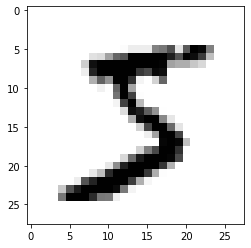

In [70]:
first_digit_info = X[0]
first_digit_image = first_digit_info.reshape(28,28)

plt.imshow(first_digit_image, cmap='binary')
plt.axis("on")

## Split the Data

- Need to create validation sets??? -> Use 50000, 10000, 10000 for train/valid/test sets
- Do "data augmentation" (create shifted copies of each image in the training set)
- Do I need to worry about stratified sampling (I think the data is already split appropriately)


The MNIST dataset is already split for use (first 60000 is training; rest is test)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
X_train, X_valid, y_train, y_valid = X_train[:50000], X_train[50000:], y_train[:50000], y_train[50000:]

## ML Model Creation

Don't spend too much time tweaking hyperparameters to start. You are just trying to shortlist a few promising models, and then you can perform fine-tuning.

- Try to implement k-fold cross-validation???
- Do grid search
- Consider OvO and OvR
- Look at learning curves (eval. metric vs. training set size)
- Can then try implementing early stopping?

**Gradient Descent**

**Logistic (ie. soft-max) Regression**

**k-Nearest Neighbors**

In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = "distance")

In [13]:
train_model(knn_model, X_train, y_train)

Time taken: 42.430959701538086 seconds


In [14]:
predict_model(knn_model, [X[0]])

Time taken: 0.09173083305358887 seconds


array([5], dtype=uint8)

In [59]:
knn_model.predict([X[0]])

array([5], dtype=uint8)

In [44]:
knn_model.predict_proba([X[0]])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [15]:
knn_predictions = predict_model(knn_model, X_valid)

Time taken: 778.7831933498383 seconds


In [16]:
knn_predictions

array([3, 8, 6, ..., 5, 6, 8], dtype=uint8)

In [17]:
confusion_matrix(y_valid, knn_predictions)

array([[ 984,    0,    3,    0,    0,    0,    2,    0,    0,    2],
       [   0, 1060,    1,    0,    1,    0,    1,    1,    0,    0],
       [   3,    8,  955,    2,    1,    1,    1,   16,    1,    2],
       [   0,    0,    4, 1006,    0,    7,    1,    3,    6,    3],
       [   0,    9,    0,    0,  946,    0,    0,    4,    0,   24],
       [   2,    1,    1,   16,    2,  868,   17,    3,    2,    3],
       [   1,    0,    0,    0,    0,    1,  965,    0,    0,    0],
       [   0,    9,    0,    0,    3,    0,    0, 1070,    0,    8],
       [   2,    7,    1,   13,    3,   14,    4,    4,  952,    9],
       [   4,    3,    0,    9,   11,    2,    0,    5,    1,  926]],
      dtype=int64)

In [18]:
accuracy_score(y_valid, knn_predictions)

0.9732

In [79]:
knn_params = [
    {"n_neighbors": [5, 6, 7], "weights": ["uniform", "distance"]}
]

In [80]:
knn__gridsearch = KNeighborsClassifier()

In [81]:
knn_grid_search_model = GridSearchCV(estimator = knn__gridsearch,
                              param_grid = knn_params,
                              return_train_score = True)

In [ ]:
train_model(knn_grid_search_model, X_train, y_train)

**SVM**

- use different kernels (Gaussian RBF, ...)
- will need to use OvR strategy (obviously!)
    - therefore, try tuning hyperparameters using *small validation sets* to speed up training

In [11]:
from sklearn.svm import SVC

In [12]:
svc_model = SVC()

In [16]:
train_model(svc_model, X_train, y_train)

Time taken: 466.93773555755615 seconds


In [17]:
svc_predictions = predict_model(svc_model, X_valid)

Time taken: 141.62647366523743 seconds


In [18]:
confusion_matrix(y_valid, svc_predictions)

array([[ 980,    0,    5,    0,    0,    0,    3,    0,    1,    2],
       [   0, 1057,    2,    1,    1,    0,    1,    1,    0,    1],
       [   2,    0,  974,    0,    3,    1,    2,    2,    5,    1],
       [   0,    1,    3, 1001,    1,    9,    0,    2,   11,    2],
       [   0,    6,    0,    0,  965,    0,    0,    1,    0,   11],
       [   2,    0,    4,   11,    3,  883,    7,    1,    2,    2],
       [   2,    0,    0,    0,    1,    1,  961,    0,    2,    0],
       [   0,    6,    6,    1,    3,    0,    0, 1067,    0,    7],
       [   1,    2,    4,    5,    0,    5,    2,    0,  986,    4],
       [   2,    3,    1,    4,    7,    4,    0,    9,    3,  928]],
      dtype=int64)

In [19]:
accuracy_score(y_valid, svc_predictions)

0.9802

In [40]:
for _ in range(10):
    print(svc_model.predict([X[_]]), end = ",")

print("\n")
for _ in range(10):
    print(y[_], end="  ,")

[5],[0],[4],[1],[9],[2],[1],[3],[1],[4],

5  ,0  ,4  ,1  ,9  ,2  ,1  ,3  ,1  ,4  ,

**Decision Tree**

- can visualize using Graphviz (but the tree may be too big!)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier()

In [30]:
train_model(tree_model, X_train, y_train)

Time taken: 21.371787071228027 seconds


In [41]:
tree_predictions = predict_model(tree_model, X_valid)

Time taken: 0.05386161804199219 seconds


In [42]:
confusion_matrix(y_valid, tree_predictions)

array([[ 916,    1,    8,   10,    6,   15,   11,    4,   15,    5],
       [   1, 1019,    8,    6,    1,    3,    2,    9,   12,    3],
       [  15,   16,  865,   15,   10,    8,   13,   25,   17,    6],
       [   7,    6,   24,  885,   13,   27,    7,   15,   23,   23],
       [   6,    5,    9,   10,  837,    8,   10,   19,   23,   56],
       [  12,    8,    7,   45,   14,  749,   24,    6,   31,   19],
       [   6,    2,   10,    7,   13,   15,  898,    3,   12,    1],
       [   1,    8,   21,    7,   13,    8,    2,  998,    4,   28],
       [  12,   11,   24,   35,   13,   29,   17,   11,  829,   28],
       [   4,    3,    9,   16,   29,   16,    4,   29,   21,  830]],
      dtype=int64)

In [43]:
accuracy_score(y_valid, tree_predictions)

0.8826

In [47]:
for _ in range(10):
    print(svc_model.predict([X[_]]), end = ",")

print("\n")
for _ in range(10):
    print(y[_], end="  ,")

[5],[0],[4],[1],[9],[2],[1],[3],[1],[4],

5  ,0  ,4  ,1  ,9  ,2  ,1  ,3  ,1  ,4  ,

**Random Forest**

- can try to use for feature importance investigations

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_model = RandomForestClassifier(n_estimators=100)

In [46]:
train_model(forest_model, X_train, y_train)

Time taken: 49.54029989242554 seconds


In [48]:
for _ in range(10):
    print(svc_model.predict([X[_]]), end = ",")

print("\n")
for _ in range(10):
    print(y[_], end="  ,")

[5],[0],[4],[1],[9],[2],[1],[3],[1],[4],

5  ,0  ,4  ,1  ,9  ,2  ,1  ,3  ,1  ,4  ,

In [49]:
forest_predictions = predict_model(forest_model, X_valid)

Time taken: 0.569481611251831 seconds


In [50]:
confusion_matrix(y_valid, forest_predictions)

array([[ 982,    0,    3,    0,    0,    0,    2,    0,    2,    2],
       [   0, 1053,    5,    2,    1,    0,    1,    0,    2,    0],
       [   3,    1,  962,    2,    3,    1,    3,    7,    6,    2],
       [   2,    0,    4,  999,    0,    7,    2,    3,    8,    5],
       [   1,    3,    0,    0,  962,    1,    1,    1,    2,   12],
       [   3,    0,    4,   19,    2,  869,    8,    0,    7,    3],
       [   0,    0,    0,    1,    2,    2,  959,    0,    3,    0],
       [   1,    4,    7,    2,    4,    0,    0, 1060,    0,   12],
       [   1,    5,    6,    5,    3,    7,    5,    0,  969,    8],
       [   6,    1,    0,   11,   11,    5,    0,    9,    8,  910]],
      dtype=int64)

In [52]:
accuracy_score(y_valid, forest_predictions)

0.9725

In [56]:
forest_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.57734568e-06, 3.44346584e-06,
       3.41010232e-06, 1.10984717e-06, 1.86009103e-06, 1.78445701e-06,
       2.22153984e-06, 2.14718443e-06, 3.43431560e-06, 4.01764387e-06,
       3.02960244e-06, 3.10376129e-06, 1.62623318e-06, 8.33570244e-07,
       3.79049525e-07, 7.06318867e-07, 8.65940023e-07, 1.68088379e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [57]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

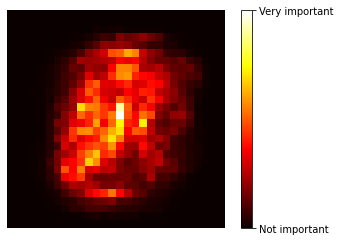

In [59]:
plot_digit(forest_model.feature_importances_)

cbar = plt.colorbar(ticks=[forest_model.feature_importances_.min(), forest_model.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

#save_fig("mnist_feature_importance_plot")
plt.show()

## PCA

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=0.95)

In [67]:
@performance
def reduce_dim(variance, X):
    pca = PCA(n_components=variance)
    return pca.fit_transform(X)

In [63]:
X_reduced = reduce_dim(0.95, X_train)

Time taken: 8.161291360855103 seconds


In [70]:
random_model_pca = RandomForestClassifier()

In [71]:
train_model(random_model_pca, X_reduced, y_train)

Time taken: 112.0368378162384 seconds


In [73]:
X_valid_reduced = reduce_dim(0.95, X_valid)

Time taken: 1.4471266269683838 seconds


In [74]:
random_predictions_pca = predict_model(random_model_pca, X_valid_reduced)

ValueError: Number of features of the model must match the input. Model n_features is 154 and input n_features is 151 

## Analyze the Best Models

- can look into the most important features? (can visualize with heatmap)
- confusion matrices
- can draw decision boundaries
- can consider doing dimensionality reduction (PCA and keep 95% variance)

## Evaluate Models on the Test Set

## Create an Ensemble

- can look into hard voting and soft voting
- can look into sampling with/without replacement (when applied to above classifiers)